In [266]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import scipy
from scipy.stats import mannwhitneyu
df = pd.read_csv('/Users/cappsjr/Downloads/price.csv')
df_1 = pd.read_csv('/Users/cappsjr/Downloads/pricepersqft.csv')

# Dataset Description

This dataset, published on Kaggle, is titled “Zillow Rent Index, 2010 – Present”, and it includes the median estimated monthly rental price and rental price per square foot (the “ppsf”) for defined areas in the United States from November 2010 to January 2017.  It covers all multifamily, single family, condos, and cooperative homes in the Zillow database, whether or not they are listed for rent.(https://www.kaggle.com/zillow/rent-index)  Zillow is a leading online real estate and rental marketplace that endeavors to help consumers buy, sell, rent, finance, and remodel homes, with a database of more than 110 million homes. (https://www.zillow.com/corp/About.htm)  Zillow produces these rent estimates, aka “Zestimates”, using a proprietary algorithm that uses public property data, local properties listed for rent, home features and location, and market conditions. (https://www.zillow.com/wikipages/What-is-a-Rent-Zestimate/)  

It is interesting to note that the data includes the median estimated monthly rental price and ppsf as opposed to the average, or mean, estimated monthly rental price and ppsf.  The median is generally used when a small number of extreme outliers will skew the mean up or down because such outliers do not affect the median, and the data in this particular set bear this out.  Below you see the mean, median, and standard deviation of the median estimated monthly rental prices in January 2017, and one will notice that the mean price for January 2017 ($1,467.29655015) is a full $203.29655015 more than the median price for January 2017 ($1,264.00).  Further, the mean ppsf for January 2017 ($0.964355902341) is a full $0.092355902341 more than the median ppsf for January 2017 ($0.872).  The boxplot below that represents the median estimated rent price for January 2017 of the entire dataset further emphasizes the number and extremity of the outliers in the data.  Even when one focuses the boxplot on the top 100 cities by population, as seen in the following graph, there are still some extreme outliers affecting the mean. 

# Questions:

1. Which cities have the highest and lowest rent and price per square foot?
    
2. For each city in the top 10 by population, which other city in the top 10 by population has the most similar rent price distribution?
    
3. How does the rent price behave for cities in the same region?

In [183]:
rent_jan = df.ix[0:, 'January 2017']
jan_mean = rent_jan.mean()
print("Jan. 2017 Mean Rental Price: ", rent_jan.mean())
jan_std = rent_jan.std()
print("Jan. 2017 Rental Price Standard Deviation: ", rent_jan.std())
jan_median = np.median(df['January 2017'])
print("Jan. 2017 Median Rental Price: ", jan_median)

print(None)

ppsf_jan = df_1.ix[0:, 'January 2017']
jan_mean_ppsf = ppsf_jan.mean()
print("Jan. 2017 Mean Price per Square Foot: ", ppsf_jan.mean())
jan_std_ppsf = ppsf_jan.std()
print("Jan. 2017 Price per Square Foot Standard Deviation: ", ppsf_jan.std())
jan_median_ppsf = np.median(df_1['January 2017'])
print("Jan. 2017 Median Price per Square Foot: ", jan_median_ppsf)
print(None)
print(scipy.stats.describe(df['January 2017'], ddof = 1, bias = True, nan_policy = 'omit'))
print(None)
print(scipy.stats.mode(df['January 2017'], axis = 0, nan_policy = 'omit'))

Jan. 2017 Mean Rental Price:  1467.29655015
Jan. 2017 Rental Price Standard Deviation:  820.707578969
Jan. 2017 Median Rental Price:  1264.0
None
Jan. 2017 Mean Price per Square Foot:  0.964355902341
Jan. 2017 Price per Square Foot Standard Deviation:  0.381297057516
Jan. 2017 Median Price per Square Foot:  0.872
None
DescribeResult(nobs=13131, minmax=(518, 17985), mean=1467.2965501485035, variance=673560.9301777397, skewness=5.59415336433794, kurtosis=59.22561857546629)
None
ModeResult(mode=array([1144]), count=array([27]))


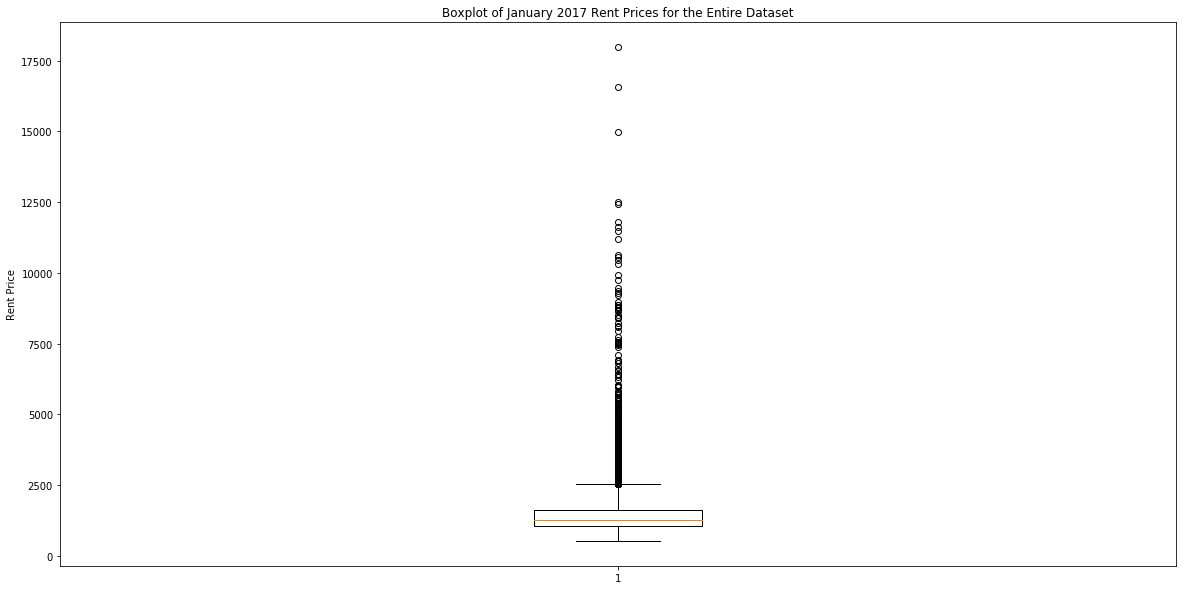

In [73]:
plt.figure(figsize = (20, 10))
plt.boxplot(df['January 2017'])
plt.title('Boxplot of January 2017 Rent Prices for the Entire Dataset')
plt.ylabel('Rent Price')
plt.show()

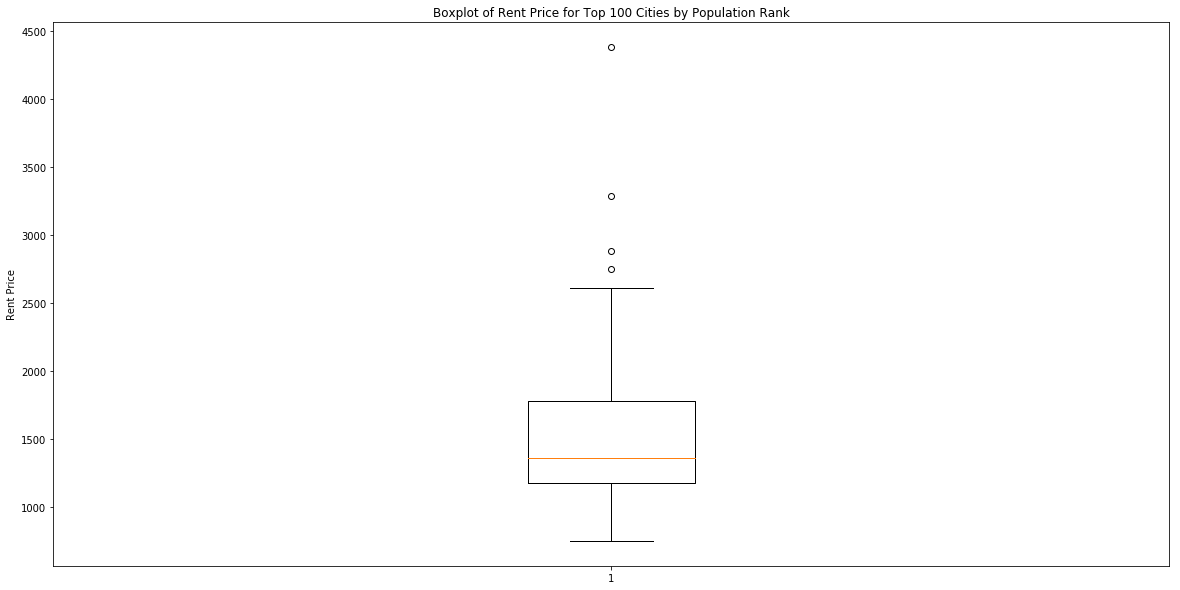

In [74]:
plt.figure(figsize = (20, 10))
plt.boxplot(top_100_rent_jan)
plt.title('Boxplot of Rent Price for Top 100 Cities by Population Rank')
plt.ylabel('Rent Price')
plt.show()

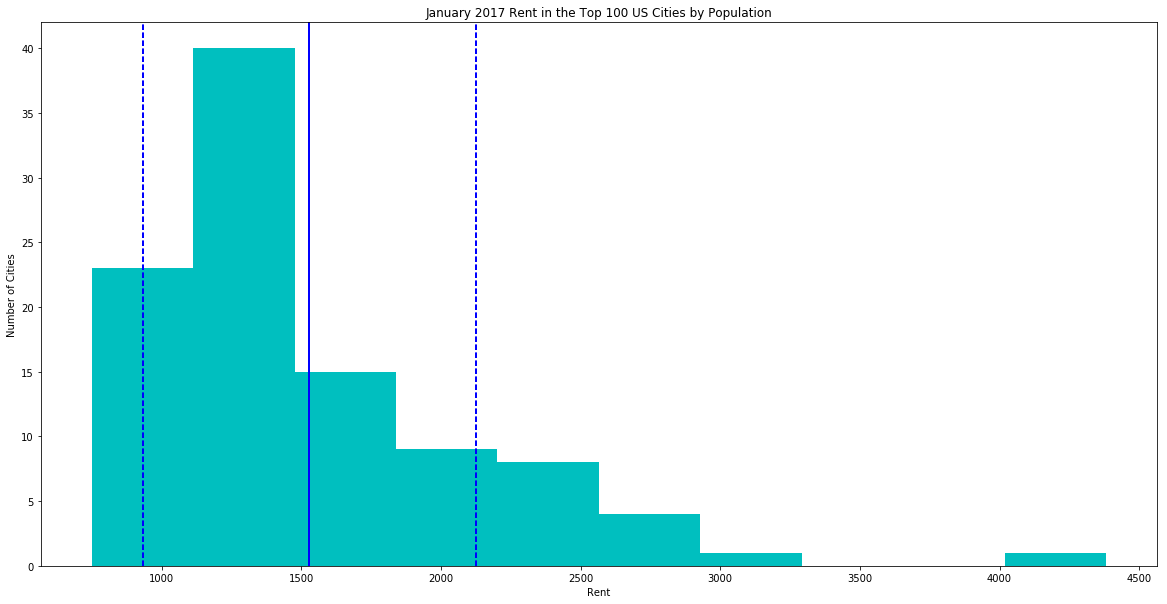

Mean:  1529.31683168
Standard Deviation:  597.169070376


In [66]:
top_100_rent_jan = df.ix[0: 100, 'January 2017']
plt.figure(figsize = (20, 10))
plt.hist(top_100_rent_jan, color = 'c')
plt.axvline(top_100_rent_jan.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(top_100_rent_jan.mean() - top_100_rent_jan.std(), color = 'b', linestyle = 'dashed', linewidth = 2)
plt.axvline(top_100_rent_jan.mean() + top_100_rent_jan.std(), color = 'b', linestyle = 'dashed', linewidth = 2)
plt.ylabel("Number of Cities")
plt.xlabel("Rent")
plt.title("January 2017 Rent in the Top 100 US Cities by Population")
plt.show()
print("Mean: ", top_100_rent_jan.mean())
print("Standard Deviation: ", top_100_rent_jan.std())

# Question 1:

Which Cities Have the Highest and Lowest Rent and Price Per Square Foot?

# Results:

Below are the top 10 highest and lowest median estimated rent prices for January 2017.  The city with the highest rent in January 2017 was Jupiter Island, FL, a city north of West Palm Beach, with a median estimated rent price of $17, 985.00.  That rent price is $16,517.70344984 more than the mean for January 2017 and $16,721 more than the median for January 2017.  The city with the lowest rent in January 2017 was Beecher, MI, part of metro Flint, MI, with a median estimated rent price of $518.00.  This is $949.29655015 less than the mean for January 2017 and $746 less than the median price for January 2017.  These numbers help explain why the mean rent of the entire dataset for January 2017 is so much higher than the median rent of the entire dataset for January 2017 because the lowest outliers are less than $1000 away from both central tendency of the data no matter how it is measured, and the highest outliers are more than $16,000 away from the central tendency.
Also below are the top 10 highest and lowest median estimated ppsf for January 2017.  The city with the highest ppsf is Fisher Island, FL, part of the Miami-Ft. Lauderdale metro area, with a ppsf of $6.406, which is $5.4416440997659 more than the mean ppsf for January 2017 and $5.534 more than the median ppsf for January 2017.  The city with the lowest ppsf is Elkin, NC, a small town in northwest North Carolina, with a ppsf of $0.378, which is $0.586355902341 less than the mean ppsf for January 2017 and $0.494 less than the median ppsf for January 2017.  Like the data for rent price, these numbers help explain why the mean ppsf of the entire dataset for January 2017 is so much higher than the median ppsf of the entire dataset for January 2017 because the lowest outliers are less $0.60 away from the central tendency no matter how it is measured, and the highest outliers are more than $5.40 more than the central tendency.
It is interesting to note that the 6 of 10 of the cities with the most expensive rent are in California, and 5 of 10 of the cities with the lowest rent are in Ohio and another 3 of 10 are in Michigan.  It seems that the West Coast is the most expensive and the Midwest “Rustbelt” states are the least expensive.  It is also interesting to note that the top 10 cities with the highest ppsf are all in California and Florida (CA: 7, FL: 3), and the top 3 cities with the lowest ppsf are all in Mount Airy, a metro area in North Carolina.

In [6]:
rent_price = pd.melt(df, id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'])
rent_price.dropna(inplace = True)
highest_rent = rent_price[rent_price['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=False) \
                .head(10)
print(highest_rent)

        City Code            City                  Metro       County State  \
983928     124901  Jupiter Island         Port St. Lucie       Martin    FL   
976845      30280        Atherton          San Francisco    San Mateo    CA   
984474       4721   Fisher Island  Miami-Fort Lauderdale   Miami-Dade    FL   
982746      38980    Hidden Hills            Los Angeles  Los Angeles    CA   
981947       6822   Rolling Hills            Los Angeles  Los Angeles    CA   
975541      55743    Hillsborough          San Francisco    San Mateo    CA   
981183      10348       Belvedere          San Francisco        Marin    CA   
984046      27005      Sea Island              Brunswick        Glynn    GA   
980130       7882        Westlake      Dallas-Fort Worth      Tarrant    TX   
978745      16583  Portola Valley          San Francisco    San Mateo    CA   

        Population Rank      variable    value  
983928            12235  January 2017  17985.0  
976845             5152  January

In [7]:
lowest_rent = rent_price[rent_price['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=True) \
                .head(10)
print(lowest_rent)

        City Code                City          Metro      County State  \
975777     166526             Beecher          Flint     Genesee    MI   
971917     398007               Flint          Flint     Genesee    MI   
981797      26010        Mount Morris          Flint     Genesee    MI   
972307      28060          Youngstown     Youngstown    Mahoning    OH   
979887     396601  West End-Cobb Town       Anniston     Calhoun    AL   
982893       4416              Drexel         Dayton  Montgomery    OH   
976549      37722            Campbell     Youngstown    Mahoning    OH   
973150      27771              Warren     Youngstown    Trumbull    OH   
978729      15206             Electra  Wichita Falls     Wichita    TX   
972471      34103         Springfield    Springfield       Clark    OH   

        Population Rank      variable  value  
975777             4084  January 2017  518.0  
971917              224  January 2017  549.0  
981797            10104  January 2017  555.0

In [8]:
price_psf = pd.melt(df_1, id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'])
price_psf.dropna(inplace = True)
highest_ppsf = price_psf[price_psf['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=False) \
                .head(10)
print(highest_ppsf)

        City Code            City                  Metro       County State  \
893633       4721   Fisher Island  Miami-Fort Lauderdale   Miami-Dade    FL   
893897      49856   Stinson Beach          San Francisco        Marin    CA   
887038      30280        Atherton          San Francisco    San Mateo    CA   
893164     124901  Jupiter Island         Port St. Lucie       Martin    FL   
890903      10348       Belvedere          San Francisco        Marin    CA   
885289      12520          Malibu            Los Angeles  Los Angeles    CA   
884292      52842    Laguna Beach            Los Angeles       Orange    CA   
893193       3734     Boca Grande             Fort Myers          Lee    FL   
889171       8185         Del Mar              San Diego    San Diego    CA   
883338      10389   Beverly Hills            Los Angeles  Los Angeles    CA   

        Population Rank      variable  value  
893633            11628  January 2017  6.406  
893897            11892  January 201

In [9]:
lowest_ppsf = price_psf[price_psf['variable'] == 'January 2017'] \
                .sort_values(by=['value'], ascending=True) \
                .head(10)
print(lowest_ppsf)

        City Code          City         Metro    County State  \
886318      28546         Elkin    Mount Airy     Surry    NC   
886767      17792        Dobson    Mount Airy     Surry    NC   
891024       7246    State Road    Mount Airy     Surry    NC   
884178      12936    New Castle    New Castle  Lawrence    PA   
884569      30398         Belen   Albuquerque  Valencia    NM   
883313      12852    Mount Airy    Mount Airy     Surry    NC   
890316      23777  Bosque Farms   Albuquerque  Valencia    NM   
883481       9768  Marshalltown  Marshalltown  Marshall    IA   
882231     398007         Flint         Flint   Genesee    MI   
893643      47061       Peralta   Albuquerque  Valencia    NM   

        Population Rank      variable  value  
886318             4313  January 2017  0.378  
886767             4762  January 2017  0.394  
891024             9019  January 2017  0.406  
884178             2173  January 2017  0.406  
884569             2564  January 2017  0.412  
88

# Preface to Questions 2 & 3:

Going forward, I will focus on the top 10 cities by population rank according to the dataset.  As of 2014, these cities had a combined population of 25,191,657. (http://www.infoplease.com/ipa/a0763098.html)  That is just under 10% of the total population in 2014, which was 318.9 million. (https://www.google.com/publicdata/explore?ds=kf7tgg1uo9ude_&met_y=population&idim=country:US&hl=en&dl=en)  Below one can find a histogram that shows the distribution of the median estimated rent price for the top 10 cities by population in January 2017 and graphs that show the median estimated rent price for the top 10 cities by population from November 2010 to January 2017 and the median estimated ppsf for the same cities and dates.  One can make some interesting notes and hypotheses just from looking at these graphs side-by-side, and questions come from these observations.  For instance, the histogram shows that there is a gap between the top three cities with the highest rent and the bottom seven cities.  This gap is also apparent when one looks at the graphs showing rent price and ppsf from November 2010 to January 2017.  How similar are those cities at the top of the distribution, those with the highest rent?  How similar are those cities that are at the bottom of the distribution, those with lower rent?  Another observation is that San Diego has the second highest median estimated rent price and ppsf even though it is number 9 the list of 10 by population rank, and it seems to follow a similar pattern of price growth as Los Angeles.  How similarly do those cities’ rent price behave?

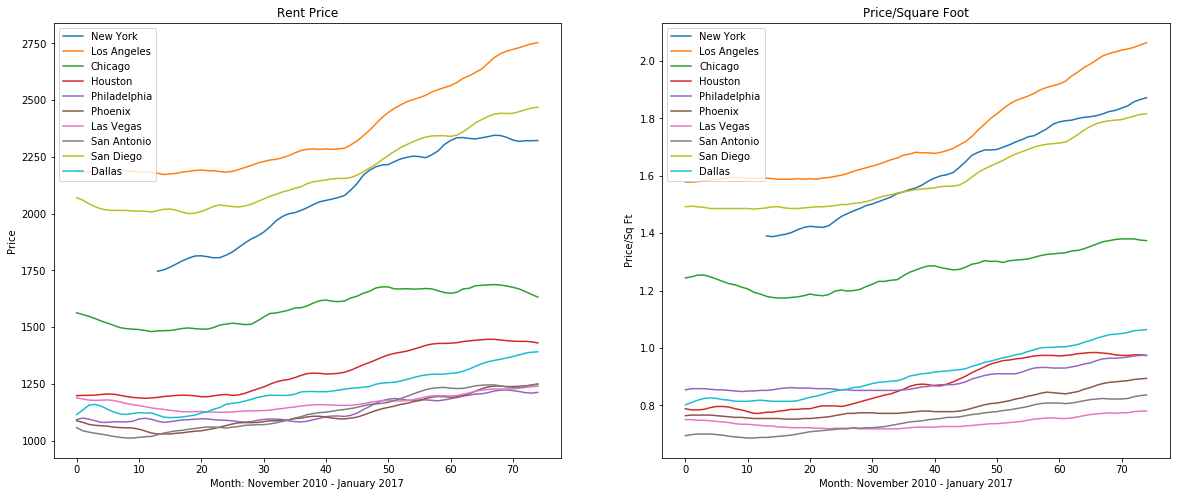

November 2010 - January 2017 Mean Rent
New York:  2089.64516129
Los Angeles:  2355.29333333
Chicago:  1587.38666667
Houston:  1300.54666667
Philadelphia:  1129.98666667
Phoenix:  1118.04
Las Vegas:  1168.49333333
San Antonio:  1123.68
San Diego:  2172.84
Dallas:  1218.14666667
None
November 2010 - January 2017 Mean Price per Square Foot
New York:  1.62570967742
Los Angeles:  1.73941333333
Chicago:  1.26762666667
Houston:  0.87376
Philadelphia:  0.88784
Phoenix:  0.796906666667
Las Vegas:  0.738506666667
San Antonio:  0.7504
San Diego:  1.59304
Dallas:  0.91248


In [12]:
NY_rent = df.ix[0, 'November 2010':]
LA_rent = df.ix[1, 'November 2010':]
Chi_rent = df.ix[2, 'November 2010':]
Hou_rent = df.ix[3, 'November 2010':]
Phi_rent = df.ix[4, 'November 2010':]
Phx_rent = df.ix[5, 'November 2010':]
LV_rent = df.ix[6, 'November 2010':]
SA_rent = df.ix[7, 'November 2010':]
SD_rent = df.ix[8, 'November 2010':]
Dal_rent = df.ix[9, 'November 2010':]

NY_ppsf = df_1.ix[0, 'November 2010':]
LA_ppsf = df_1.ix[1, 'November 2010':]
Chi_ppsf = df_1.ix[2, 'November 2010':]
Hou_ppsf = df_1.ix[3, 'November 2010':]
Phi_ppsf = df_1.ix[4, 'November 2010':]
Phx_ppsf = df_1.ix[5, 'November 2010':]
LV_ppsf = df_1.ix[6, 'November 2010':]
SA_ppsf = df_1.ix[7, 'November 2010':]
SD_ppsf = df_1.ix[8, 'November 2010':]
Dal_ppsf = df_1.ix[9, 'November 2010':]

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.plot(NY_rent.values, label = "New York")
plt.plot(LA_rent.values, label = "Los Angeles")
plt.plot(Chi_rent.values, label = "Chicago")
plt.plot(Hou_rent.values, label = "Houston")
plt.plot(Phi_rent.values, label = "Philadelphia")
plt.plot(Phx_rent.values, label = "Phoenix")
plt.plot(LV_rent.values, label = "Las Vegas")
plt.plot(SA_rent.values, label = "San Antonio")
plt.plot(SD_rent.values, label = "San Diego")
plt.plot(Dal_rent.values, label = "Dallas")
plt.legend(loc = 'upper left')
plt.ylabel('Price')
plt.xlabel('Month: November 2010 - January 2017')
plt.title('Rent Price')

plt.subplot(1, 2, 2)
plt.plot(NY_ppsf.values, label = "New York")
plt.plot(LA_ppsf.values, label = "Los Angeles")
plt.plot(Chi_ppsf.values, label = "Chicago")
plt.plot(Hou_ppsf.values, label = "Houston")
plt.plot(Phi_ppsf.values, label = "Philadelphia")
plt.plot(Phx_ppsf.values, label = "Phoenix")
plt.plot(LV_ppsf.values, label = "Las Vegas")
plt.plot(SA_ppsf.values, label = "San Antonio")
plt.plot(SD_ppsf.values, label = "San Diego")
plt.plot(Dal_ppsf.values, label = "Dallas")
plt.legend(loc = 'upper left')
plt.ylabel('Price/Sq Ft')
plt.xlabel('Month: November 2010 - January 2017')
plt.title('Price/Square Foot')
plt.show()

""""""

print("November 2010 - January 2017 Mean Rent")
print("New York: ", df.ix[0, 'November 2010':].mean())
print("Los Angeles: ", df.ix[1, 'November 2010':].mean())
print("Chicago: ", df.ix[2, 'November 2010':].mean())
print("Houston: ", df.ix[3, 'November 2010':].mean())
print("Philadelphia: ", df.ix[4, 'November 2010':].mean())
print("Phoenix: ", df.ix[5, 'November 2010':].mean())
print("Las Vegas: ", df.ix[6, 'November 2010':].mean())
print("San Antonio: ", df.ix[7, 'November 2010':].mean())
print("San Diego: ", df.ix[8, 'November 2010':].mean())
print("Dallas: ", df.ix[9, 'November 2010':].mean())
print(None)
print("November 2010 - January 2017 Mean Price per Square Foot")
print("New York: ", df_1.ix[0, 'November 2010':].mean())
print("Los Angeles: ", df_1.ix[1, 'November 2010':].mean())
print("Chicago: ", df_1.ix[2, 'November 2010':].mean())
print("Houston: ", df_1.ix[3, 'November 2010':].mean())
print("Philadelphia: ", df_1.ix[4, 'November 2010':].mean())
print("Phoenix: ", df_1.ix[5, 'November 2010':].mean())
print("Las Vegas: ", df_1.ix[6, 'November 2010':].mean())
print("San Antonio: ", df_1.ix[7, 'November 2010':].mean())
print("San Diego: ", df_1.ix[8, 'November 2010':].mean())
print("Dallas: ", df_1.ix[9, 'November 2010':].mean())

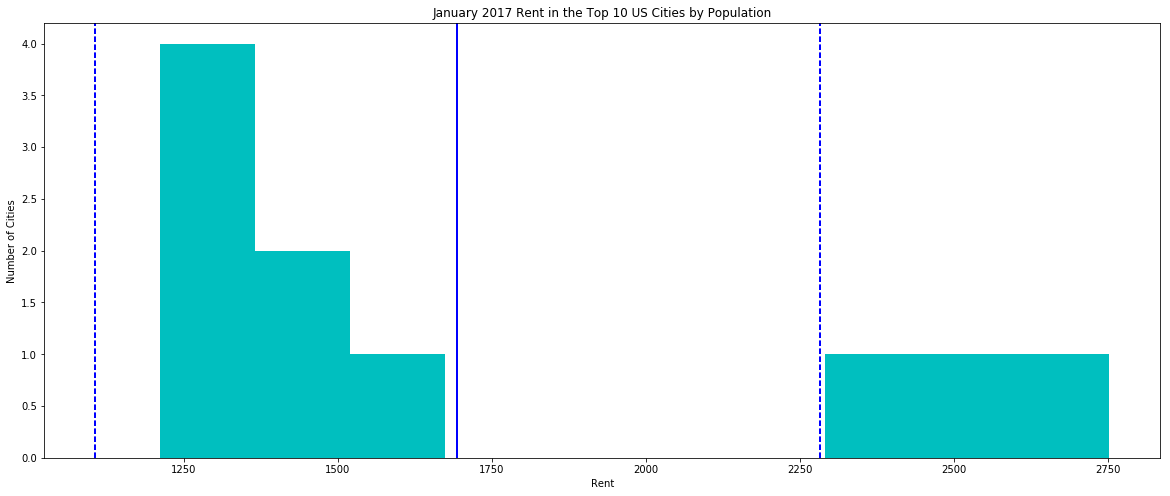

Mean:  1694.5
Standard Deviation:  588.607631996


In [81]:
top_10_jan_rent = df.ix[:9, 'January 2017']
plt.figure(figsize = (20, 8))
plt.hist(top_10_jan_rent.values, color = 'c')
plt.axvline(top_10_jan_rent.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(top_10_jan_rent.mean() - top_10_jan_rent.std(), color = 'b', linestyle = 'dashed', linewidth = 2)
plt.axvline(top_10_jan_rent.mean() + top_10_jan_rent.std(), color = 'b', linestyle = 'dashed', linewidth = 2)
plt.ylabel("Number of Cities")
plt.xlabel("Rent")
plt.title("January 2017 Rent in the Top 10 US Cities by Population")
plt.show()

print("Mean: ", top_10_jan_rent.mean())
print("Standard Deviation: ", top_10_jan_rent.std())

# Question 2: 

For each city, which other city in the top 10 by rent price has the most similar rent price from November 2010 - January 2017?

# Hypothesis and Method:  

My hypothesis was that cities closest to each other in population would also have the most similar rent price from November 2010 to January 2017.  I tested this hypothesis by comparing all the cities in the top 10 by population, finding the p-value using the Mann Whitney U test.  I chose the Mann Whitney U test to calculate the p-value because the rent price distributions was non-normal for each of the cities.  After calculating the p-values, I created an array with those p-values and found the p-value that was closest to one for each pair of cities, indicating that those cities’ rent price distributions were most alike. 

# Results:

After running the Mann Whitney U test for each pair, the following are results with their p-values.  The city with the most similar rent price distribution to Los Angeles is New York with a p-value of 4.963549e-05.  This is small p-value indicates that their distributions are not very similar.  The city with the most similar rent price distribution to New York is San Diego with a p-value of 1.448268e-03.  It is larger than the LA-NY p-value, so the NY-San Diego distributions are more similar than the LA-NY distributions, but it is still a relatively small p-value, which indicates that the distributions are not overly similar.  The city with the most similar rent price distribution to Chicago is New York with a p-value of 3.878034e-22.  This p-value is miniscule, which indicates that the distributions are very different.  The city with the most similar rent price distribution to Houston is Dallas with a p-value of 2.061615e-06.  Like the LA-NY distributions, this p-value indicates that there is some overlap in the distributions, but they are not very alike.  The city with the most similar rent price distribution to Philadelphia is San Antonio with a p-value of 1.238591e-01.  This p-value indicates that there is a fair amount of overlap between these distributions.  The city with the most similar rent price distribution to Phoenix is also San Antonio with a p-value of 4.827597e-01.  Like the Philadelphia-San Antonio distributions, this p-value indicates that there is a good deal of overlap between the distributions.  In fact, this p-value indicates that out of the top 10 cities by population, Phoenix and San Antonio have the most similar rent price distributions.  The city with the most similar rent price distribution to Las Vegas is Dallas with a p-value of 8.873258e-04. This p-value indicates that there is some overlap, but the distributions are not very similar.  The city with the most similar rent price distribution to San Antonio is Phoenix (see p-value above).  The city with the most similar rent price distribution to San Diego is New York (see p-value above).  The city with the most similar rent price distribution to Dallas is Las Vegas (see p-value above).     

Though there was a case where the cities closest in population had similar rent price distributions, the overall results did not seem to support my hypothesis.  The only case that the city with most similar rent price distribution to Los Angeles was New York, and those two cities are number one and number two by population rank, respectively.  That being said, the city with the closest rent price distribution to New York was not Los Angeles but San Diego, which is the number nine city by population rank.  In fact, when observing the results, no pattern emerges that helps determine which cities’ rent price distributions will be similar.  

In [236]:
cities = np.array(['Los Angeles', 'New York', 'Chicago', 'Houston', 'Philadelphia', 'Phoenix', 'Las Vegas', 'San Antonio', 'San Diego', 'Dallas'])
p_value = pd.DataFrame(index=cities, columns=cities)
p_value['Los Angeles'] = [0.49924990457041063, 4.9635487436131268e-05, 2.042145010602513e-26, 2.0417357403859238e-26, 2.0439877061436244e-26, 2.0468573099659853e-26, 2.0429637884695208e-26, 2.0482935688685864e-26, 3.9629445890582362e-09, 2.0495254216732469e-26]
p_value['New York'] = [4.9635487436131268e-05, 0.49900302946151021, 3.8780343683429182e-22, 3.8934213003768721e-22, 3.8825873799293283e-22, 3.8899969397284316e-22, 3.8803102348579065e-22, 3.8939923076364473e-22, 0.0014482676132323076, 3.8951345626679047e-22]
p_value['Chicago'] = [2.042145010602513e-26, 3.8780343683429182e-22, 0.49924995261729077, 2.0435780796823624e-26, 2.0376473876633344e-26, 2.0487041070895116e-26, 2.0448071966987537e-26, 2.0501416160434124e-26, 2.0503470538780695e-26, 2.0513745409688378e-26]
p_value['Houston'] = [2.0417357403859238e-26, 3.8934213003768721e-22, 2.0435780796823624e-26, 0.49924994194100419, 7.9347432281601939e-21, 7.6713748693978237e-20, 2.6163074263918957e-19, 1.7186127773316913e-16, 2.0499361980656192e-26, 2.0616147562896692e-06]
p_value['Philadelphia'] = [2.0358102064688781e-26, 3.8825873799293283e-22, 2.0376473876633344e-26, 7.9347432281601939e-21, 0.49924978708359879, 0.03542985516510324, 1.3812353254324659e-06, 0.12385908282023422, 2.0439877061436244e-26, 1.592737565404119e-12]
p_value['Phoenix'] = [2.046857e-26, 3.8899969397284316e-22, 2.048704e-26, 7.671375e-20, 3.542986e-02, 0.49925007536182786, 5.2765632271903261e-07, 0.48275974587626125, 2.055077608820293e-26, 2.9403064406116293e-12]
p_value['Las Vegas'] = [2.042964e-26, 3.8803102348579065e-22, 2.044807e-26, 2.616307e-19, 1.381235e-06, 5.276563e-07, 0.4992499739684963, 0.00052303785717357221, 2.0511690038221264e-26, 0.00088732575131616836]
p_value['San Antonio'] = [2.048294e-26, 3.8939923076364473e-22, 2.050142e-26, 1.718613e-16, 1.238591e-01, 4.827597e-01, 5.230379e-04, 0.49925011270690145, 2.0565194315284781e-26, 8.8723464703106924e-09]
p_value['San Diego'] = [3.962945e-09, 0.0014482676132323076, 2.050347e-26, 2.049936e-26, 2.043988e-26, 2.055078e-26, 2.051169e-26, 2.056519e-26, 0.49925011804145658, 2.0577560561946212e-26]
p_value['Dallas'] = [2.049525e-26, 3.8951345626679047e-22, 2.051375e-26, 2.061615e-06, 1.592738e-12, 2.940306e-12, 8.873258e-04, 8.872346e-09, 2.057756e-26, 0.49925014471252438]
print(p_value)

               Los Angeles      New York       Chicago       Houston  \
Los Angeles   4.992499e-01  4.963549e-05  2.042145e-26  2.041736e-26   
New York      4.963549e-05  4.990030e-01  3.878034e-22  3.893421e-22   
Chicago       2.042145e-26  3.878034e-22  4.992500e-01  2.043578e-26   
Houston       2.041736e-26  3.893421e-22  2.043578e-26  4.992499e-01   
Philadelphia  2.043988e-26  3.882587e-22  2.037647e-26  7.934743e-21   
Phoenix       2.046857e-26  3.889997e-22  2.048704e-26  7.671375e-20   
Las Vegas     2.042964e-26  3.880310e-22  2.044807e-26  2.616307e-19   
San Antonio   2.048294e-26  3.893992e-22  2.050142e-26  1.718613e-16   
San Diego     3.962945e-09  1.448268e-03  2.050347e-26  2.049936e-26   
Dallas        2.049525e-26  3.895135e-22  2.051375e-26  2.061615e-06   

              Philadelphia       Phoenix     Las Vegas   San Antonio  \
Los Angeles   2.035810e-26  2.046857e-26  2.042964e-26  2.048294e-26   
New York      3.882587e-22  3.889997e-22  3.880310e-22  3.89399

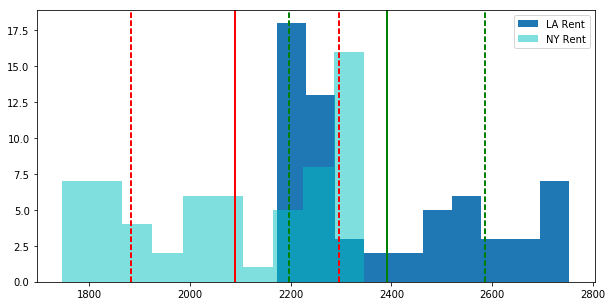

LA Mean:  2390.77419355
LA Standard Deviation:  194.684395238
None
NY Mean:  2089.64516129
NY Standard Deviation:  207.087856288


In [261]:
plt.figure(figsize=(10, 5))
plt.hist(LA_rent[13:].values, label = 'LA Rent')
plt.axvline(LA_rent[13:].mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(LA_rent[13:].mean() + LA_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(LA_rent[13:].mean() - LA_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(NY_rent[13:].values, label = 'NY Rent', color = 'c', alpha = 0.5)
plt.axvline(NY_rent[13:].mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(NY_rent[13:].mean() + NY_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(NY_rent[13:].mean() - NY_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("LA Mean: ", LA_rent[13:].mean())
print("LA Standard Deviation: ", LA_rent[13:].std())
print(None)
print("NY Mean: ", NY_rent[13:].mean())
print("NY Standard Deviation: ", NY_rent[13:].std())

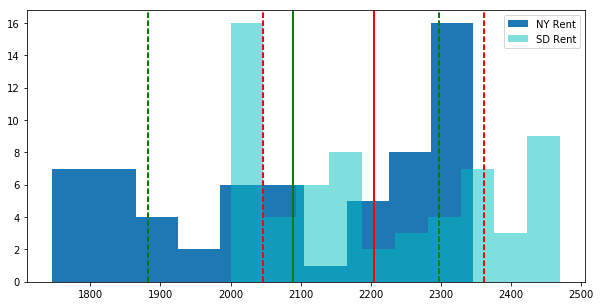

NY Mean:  2089.64516129
NY Standard Deviation:  207.087856288
None
SD Mean:  2203.9516129
SD Standard Deviation:  157.687117827


In [259]:
plt.figure(figsize=(10, 5))
plt.hist(NY_rent[13:].values, label = 'NY Rent')
plt.axvline(NY_rent[13:].mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(NY_rent[13:].mean() + NY_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(NY_rent[13:].mean() - NY_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(SD_rent[13:].values, label = 'SD Rent', color = 'c', alpha = 0.5)
plt.axvline(SD_rent[13:].mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(SD_rent[13:].mean() + SD_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(SD_rent[13:].mean() - SD_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("NY Mean: ", NY_rent[13:].mean())
print("NY Standard Deviation: ", NY_rent[13:].std())
print(None)
print("SD Mean: ", SD_rent[13:].mean())
print("SD Standard Deviation: ", SD_rent[13:].std())

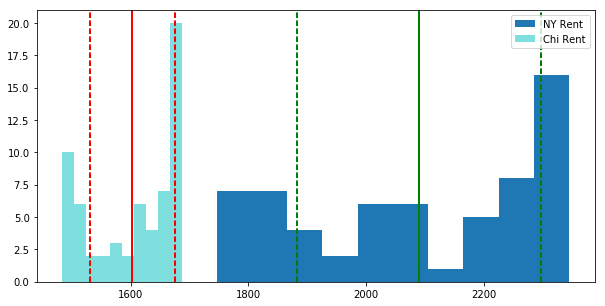

NY Mean:  2089.64516129
NY Standard Deviation:  207.087856288
None
Chi Mean:  1602.69354839
Chi Standard Deviation:  72.2306389533


In [260]:
plt.figure(figsize=(10, 5))
plt.hist(NY_rent[13:].values, label = 'NY Rent')
plt.axvline(NY_rent[13:].mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(NY_rent[13:].mean() + NY_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(NY_rent[13:].mean() - NY_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(Chi_rent[13:].values, label = 'Chi Rent', color = 'c', alpha = 0.5)
plt.axvline(Chi_rent[13:].mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(Chi_rent[13:].mean() + Chi_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(Chi_rent[13:].mean() - Chi_rent[13:].std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("NY Mean: ", NY_rent[13:].mean())
print("NY Standard Deviation: ", NY_rent[13:].std())
print(None)
print("Chi Mean: ", Chi_rent[13:].mean())
print("Chi Standard Deviation: ", Chi_rent[13:].std())

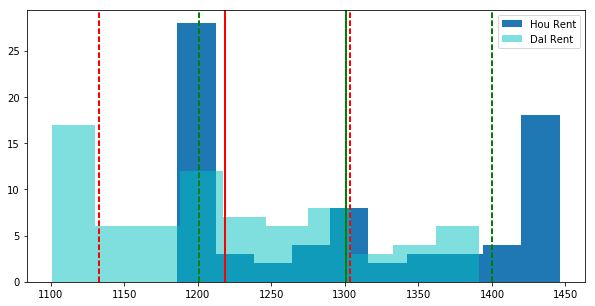

Hou Mean:  1300.54666667
Hou Standard Deviation:  99.5225484886
None
Dal Mean:  1218.14666667
Dal Standard Deviation:  85.6161599632


In [252]:
plt.figure(figsize=(10, 5))
plt.hist(Hou_rent.values, label = 'Hou Rent')
plt.axvline(Hou_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(Hou_rent.mean() + Hou_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(Hou_rent.mean() - Hou_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(Dal_rent.values, label = 'Dal Rent', color = 'c', alpha = 0.5)
plt.axvline(Dal_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(Dal_rent.mean() + Dal_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(Dal_rent.mean() - Dal_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("Hou Mean: ", Hou_rent.mean())
print("Hou Standard Deviation: ", Hou_rent.std())
print(None)
print("Dal Mean: ", Dal_rent.mean())
print("Dal Standard Deviation: ", Dal_rent.std())

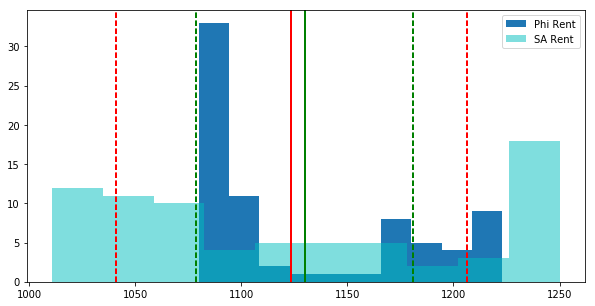

Phi Mean:  1129.98666667
Phi Standard Deviation:  51.1313870215
None
SA Mean:  1123.68
SA Standard Deviation:  82.7601810508


In [251]:
plt.figure(figsize=(10, 5))
plt.hist(Phi_rent.values, label = 'Phi Rent')
plt.axvline(Phi_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(Phi_rent.mean() + Phi_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(Phi_rent.mean() - Phi_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(SA_rent.values, label = 'SA Rent', color = 'c', alpha = 0.5)
plt.axvline(SA_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(SA_rent.mean() + SA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(SA_rent.mean() - SA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("Phi Mean: ", Phi_rent.mean())
print("Phi Standard Deviation: ", Phi_rent.std())
print(None)
print("SA Mean: ", SA_rent.mean())
print("SA Standard Deviation: ", SA_rent.std())

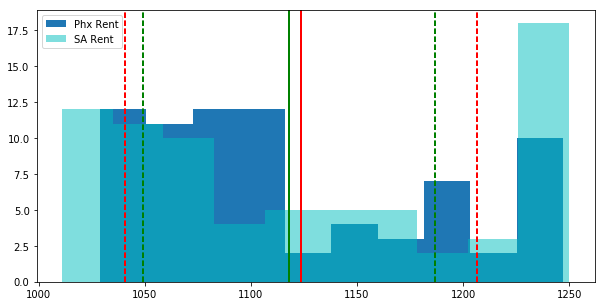

Phx Mean:  1118.04
Phx Standard Deviation:  68.7102101072
None
SA Mean:  1123.68
SA Standard Deviation:  82.7601810508


In [250]:
plt.figure(figsize=(10, 5))
plt.hist(Phx_rent.values, label = 'Phx Rent')
plt.axvline(Phx_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(Phx_rent.mean() + Phx_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(Phx_rent.mean() - Phx_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(SA_rent.values, label = 'SA Rent', color = 'c', alpha = 0.5)
plt.axvline(SA_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(SA_rent.mean() + SA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(SA_rent.mean() - SA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper left')
plt.show()
print("Phx Mean: ", Phx_rent.mean())
print("Phx Standard Deviation: ", Phx_rent.std())
print(None)
print("SA Mean: ", SA_rent.mean())
print("SA Standard Deviation: ", SA_rent.std())

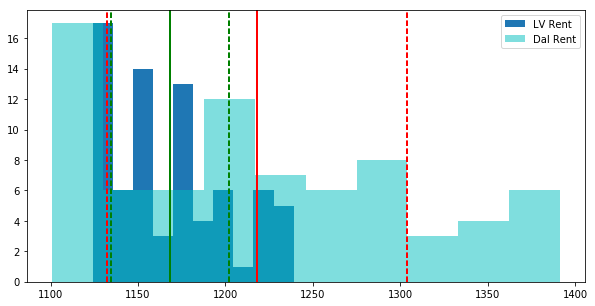

LV Mean:  1168.49333333
LV Standard Deviation:  33.7071543185
None
Dal Mean:  1218.14666667
Dal Standard Deviation:  85.6161599632


In [249]:
plt.figure(figsize=(10, 5))
plt.hist(LV_rent.values, label = 'LV Rent')
plt.axvline(LV_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(LV_rent.mean() + LV_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(LV_rent.mean() - LV_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(Dal_rent.values, label = 'Dal Rent', color = 'c', alpha = 0.5)
plt.axvline(Dal_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(Dal_rent.mean() + Dal_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(Dal_rent.mean() - Dal_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("LV Mean: ", LV_rent.mean())
print("LV Standard Deviation: ", LV_rent.std())
print(None)
print("Dal Mean: ", Dal_rent.mean())
print("Dal Standard Deviation: ", Dal_rent.std())

# Question 3:

How does the rent price for cities in the same region behave compared to each other?

# Hypothesis and Method

I developed a hypothesis that the rent price of cities in the same region would behave in a similar manner.  To test this, I chose to compare two cities from the same region, San Diego and Los Angeles, because they are located very near each other in Southern California.  I compared the two cities by looking at their rent price from November 2010 to January 2017, graphing their rent price distributions and p-value for those distributions, and calculating the rent price difference from November 2010 to January 2017.  

# Results:

When looking at the graphs showing the rent price from November 2010 to January 2017 and the rent price distributions seems to support the hypothesis that the two cities’ rent price are behaving in a similar manner. Though neither the rent price nor the rent price distributions are identical, the rent prices seem to grow at the same rate, and the rent price distributions seem to have the same shape.  However, the graph showing rent price difference shows that the two cities’ rent price does not really behave alike.  For the first 40 months, there was a lot of fluctuation in the rent price difference that was trending down, but after month 40 the price difference begins to increase dramatically.  From November 2010 until April 2014, the difference fluctuates but trends down until it hit $130 in April, its lowest point since December 2010 when it was $125.  After April 2014, there were three big increases in the difference that make up the larger increase over the course of nearly three years.  The first increase took place between April 2014 and February 2015 when the price difference increased from $130 to $190 (these points are marked with a red and green dot, respectively).  There was a brief pause in that upward trend from February 2015 to June 2015 when the difference decreased to $183, but the difference began to increase sharply again from June 2015 to January 2016 when the difference increased to $236 (these points are marked with a red and green square, respectively).  The second sharp increase was followed by an even briefer pause in the upward trend from January 2016 to March 2016 when the difference decreased to $222.  The final sharp increase in difference began in March 2016 and continues until January 2017 when our data ends.  As of January 2017, the difference in the median estimated rent price of Los Angeles and San Diego was $284 (this point is marked with a green triangle).  Nothing in the data explains the growth in the rent price difference between the two cities, but perhaps that answer may be learned from other sources.

An interesting observation is that the increase of the difference in rent prices seems to slow or pause in the winter months until Spring or Summer.  The data does not suggest any reason for this, and I have not found any outside sources to shed light on the subject, but it would be interesting to learn if there was a reason behind it.  

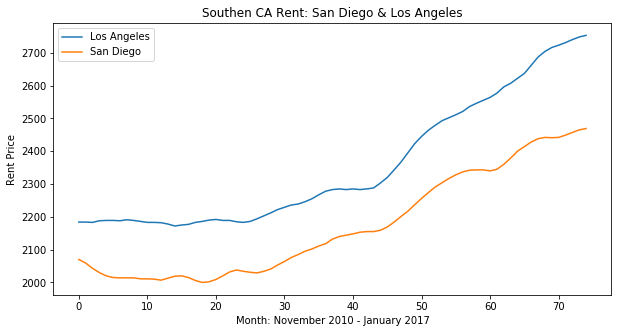

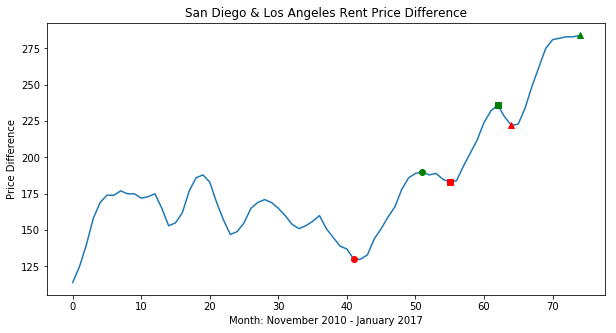

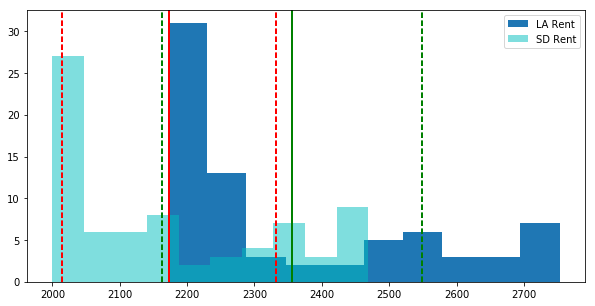

LA Mean:  2390.77419355
LA Standard Deviation:  194.684395238
None
SD Mean:  2172.84
SD Standard Deviation:  158.879355895


MannwhitneyuResult(statistic=1277.0, pvalue=3.9629445890582362e-09)

In [265]:
plt.figure(figsize = (10, 5))
plt.plot(LA_rent.values, label = 'Los Angeles')
plt.plot(SD_rent.values, label = 'San Diego')
plt.xlabel('Month: November 2010 - January 2017')
plt.ylabel('Rent Price')
plt.title('Southen CA Rent: San Diego & Los Angeles')
plt.legend(loc='upper left')
plt.show()

LA_SD_rent_diff = LA_rent.values - SD_rent.values
plt.figure(figsize = (10, 5))
plt.plot(LA_SD_rent_diff)
plt.plot([41], [130], 'ro') #Difference of $130 in April 2014 before the difference begins to increase
plt.plot([51], [190], 'go') #End of the first big increase in difference of rent price, Feb. 2015
plt.plot([55], [183], 'rs') #Diff. decreased to $183 in June 2015 before taking off again
plt.plot([62], [236], 'gs') #Next peak difference was Jan. 2016
plt.plot([64], [222], 'r^') #Price difference in Mar. 2016 before it began increasing to the present
plt.plot([74], [284], 'g^') #Difference is still increasing, as of Jan. 2017 it was $284
plt.xlabel('Month: November 2010 - January 2017')
plt.ylabel('Price Difference')
plt.title('San Diego & Los Angeles Rent Price Difference')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(LA_rent.values, label = 'LA Rent')
plt.axvline(LA_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'g')
plt.axvline(LA_rent.mean() + LA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.axvline(LA_rent.mean() - LA_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'g')
plt.hist(SD_rent.values, label = 'SD Rent', color = 'c', alpha = 0.5)
plt.axvline(SD_rent.mean(), linestyle = 'solid', linewidth = 2, color = 'r')
plt.axvline(SD_rent.mean() + SD_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.axvline(SD_rent.mean() - SD_rent.std(), linestyle = 'dashed', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.show()
print("LA Mean: ", LA_rent[13:].mean())
print("LA Standard Deviation: ", LA_rent[13:].std())
print(None)
print("SD Mean: ", SD_rent.mean())
print("SD Standard Deviation: ", SD_rent.std())

scipy.stats.mannwhitneyu(LA_rent.values, SD_rent.values, use_continuity = True, alternative = None)

# Future Research

1. What will the top 10 most expensive cities by rent in 5 year? 10 years?
2. What will be the top 10 least expensive cities by rent in 5 years? 10 years?
3. Do any variables exist, outside of region and population, that affect the rent price growth rate?